# Unit 5 - Financial Planning


In [28]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [29]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [30]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
# YOUR CODE HERE!
crypto_portfolio = {"Portfolio":[1.2,5.3]}

tickers = ["BTC","ETH"]

portfolio_df = pd.DataFrame(crypto_portfolio, index=tickers)

portfolio_df

,Portfolio
BTC,1.2
ETH,5.3


In [31]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [32]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = requests.get(btc_url).json()

# Fetch current ETH price
# YOUR CODE HERE!]
eth_price = requests.get(eth_url).json()

# Print details from website to use for parsing
print(json.dumps(btc_price, indent = 4))
print(json.dumps(eth_price, indent = 4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18740043,
            "total_supply": 18740043,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 32644.0,
                    "volume_24h": 50232614880,
                    "market_cap": 611354983936,
                    "percentage_change_1h": 0.400802190278781,
                    "percentage_change_24h": -6.83165656441295,
                    "percentage_change_7d": -16.6138545549242,
                    "percent_change_1h": 0.400802190278781,
                    "percent_change_24h": -6.83165656441295,
                    "percent_change_7d": -16.6138545549242
                },
                "CAD": {
                    "price": 40347.984,
                    "volume_24h": 62087511991.68,
                    "m

In [33]:
# Compute current value of my crpto
# YOUR CODE HERE!

# Parsing the data
btc_price_1 = btc_price["data"]["1"]["quotes"]["USD"]["price"]
eth_price_1 = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Getting value of crypto holdings

my_btc_value = my_btc*btc_price_1
my_eth_value = my_eth*eth_price_1

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39172.80
The current value of your 5.3 ETH is $10290.69


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [34]:
# REVIEW CODE BELOW AND CHANGE

In [35]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

shares_data = {"Shares":[200,50]}

tickers = ["AGG","SPY"]

df_shares = pd.DataFrame(shares_data, index = tickers)

df_shares

,Shares
AGG,200
SPY,50


In [36]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [37]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-06-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today,
    limit=1000,
).df

# Preview DataFrame
# YOUR CODE HERE!
df_ticker

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-18 00:00:00-04:00  115.05  115.39  114.91  115.29  5438261  417.08   

                                                              
                               high    low   close    volume  
time                                                          
2021-06-18 00:00:00-04:00  417.8281  414.7  415.01  92753385

In [38]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_closing_price = pd.DataFrame()

df_closing_price["AGG"] = df_ticker["AGG"]["close"]
df_closing_price["SPY"] = df_ticker["SPY"]["close"]

agg_close_price = df_closing_price["AGG"][0]
spy_close_price = df_closing_price["SPY"][0]

In [39]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20750.50
The current value of your 200 AGG shares is $23058.00


In [40]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.29
Current SPY closing price: $415.01


### Savings Health Analysis

In [61]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
# YOUR CODE HERE!
data = {"amount":[crypto,shares]}


df_savings = pd.DataFrame(data, index=["crypto","shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,49463.492
shares,43808.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

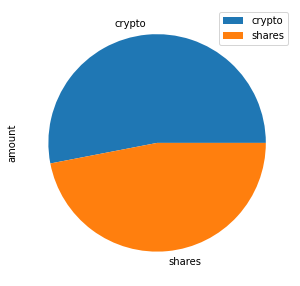

In [65]:
# Plot savings pie chart
# YOUR CODE HERE!

#df_savings.plot.pie(y='amount',figsize=(5, 5))
df_savings.plot.pie(subplots = True,figsize=(5, 5))

In [72]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

emergency_fund

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto+shares
total_savings

# Validate saving health
# YOUR CODE HERE!
## tested with different multiples of monthly income to ensure that conditional statements below function


if total_savings > emergency_fund:
    print(f"Congratulations on having ${round(total_savings,2)} saved up. This is enough money to cover for emergencies")
elif total_savings == emergency_fund:
    print(f"Congratulations on having saved upenough saved up for emergencies")
else:
    print(f"Create plan to increase savings. You are ${emergency_fund-total_savings} away from reaching your savings goal")


Create plan to increase savings. You are $50728.008 away from reaching your savings goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [78]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-05', tz='America/New_York').isoformat()

In [79]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-06-14 00:00:00-04:00  110.00  110.18  109.85  109.950  2304819.0     NaN   
2017-06-15 00:00:00-04:00  109.90  109.90  109.78  109.870  1938779.0  242.68   
2017-06-16 00:00:00-04:00  109.86  109.97  109.85  109.945  1709677.0  242.77   
2017-06-19 00:00:00-04:00  109.87  109.90  109.74  109.790  1375531.0  243.59   
2017-06-20 00:00:00-04:00  109.85  110.03  109.80  109.975  2010628.0  244.25   

                                                                 
                             high       low   close      volume  
time                                                             
2017-06-14 00:00:00-04:00     NaN       NaN     NaN         NaN  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068.0  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243.0  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64  42503652.0  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04  39203167.0

In [80]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast 30 years daily returns


MC_Stocks = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [81]:
# Printing the simulation input data
# YOUR CODE HERE!
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-06-14 00:00:00-04:00  110.00  110.18  109.85  109.950  2304819.0     NaN   
2017-06-15 00:00:00-04:00  109.90  109.90  109.78  109.870  1938779.0  242.68   
2017-06-16 00:00:00-04:00  109.86  109.97  109.85  109.945  1709677.0  242.77   
2017-06-19 00:00:00-04:00  109.87  109.90  109.74  109.790  1375531.0  243.59   
2017-06-20 00:00:00-04:00  109.85  110.03  109.80  109.975  2010628.0  244.25   

                                                                 
                             high       low   close      volume  
time                                                             
2017-06-14 00:00:00-04:00     NaN       NaN     NaN         NaN  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068.0  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243.0  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64  42503652.0  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04  39203167.0

In [82]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999305,1.001412,1.008686,0.990078,0.996035,1.010516,1.006931,1.000313,1.001635,0.977368,...,0.999351,1.003753,1.001118,1.000696,1.007666,0.996461,0.991398,1.006740,0.994294,0.989330
2,1.002389,1.001145,1.006839,0.983709,0.996145,1.019887,1.006480,1.012046,1.011403,0.976337,...,1.000046,0.991852,0.994380,1.022841,1.008243,1.007099,0.987182,0.995458,0.989378,0.991769
3,1.015621,1.001513,1.011393,0.987383,0.993399,1.027220,1.000748,1.002061,1.001169,0.981454,...,0.999568,1.006421,1.003171,1.015512,1.022112,1.001990,0.976057,0.990849,0.996932,1.000680
4,1.017720,0.998811,1.015170,0.979870,0.988152,1.022446,1.007452,0.994614,0.999610,0.988396,...,0.996725,1.006078,1.001226,1.013681,1.026530,1.000718,0.973778,0.997724,0.987083,1.009241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,23.449439,9.403932,7.483578,18.903059,7.509099,16.134515,5.242622,18.005244,11.643234,2.404890,...,11.852245,19.116383,11.281289,27.795346,8.401015,4.968539,19.121307,5.132945,11.403255,16.637981
7557,23.559560,9.440887,7.534926,18.975078,7.553010,16.314289,5.316163,18.053704,11.565312,2.393021,...,11.897178,19.304115,11.312767,27.759987,8.508432,4.983074,19.231681,5.099483,11.442030,16.647051
7558,23.512512,9.410666,7.484564,18.849547,7.535781,16.275600,5.271776,17.872293,11.747139,2.381821,...,11.830585,19.154170,11.412763,27.849968,8.403657,4.965114,19.311750,5.126852,11.532707,16.818797
7559,23.548587,9.488805,7.430625,18.784070,7.596551,16.192559,5.242964,17.683535,11.710586,2.387510,...,11.866685,18.956058,11.342335,28.078180,8.341530,4.939528,19.146678,5.124711,11.457498,16.770557


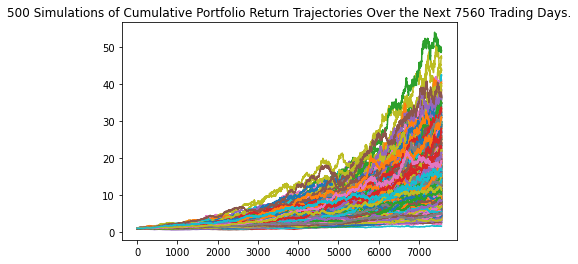

In [83]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_Stocks.plot_simulation()

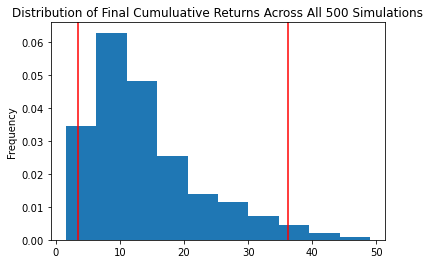

In [84]:
# Plot probability distribution and confidence intervals
# YOUR CODplot_simulation
dist_plot = MC_Stocks.plot_distribution()

### Retirement Analysis

In [85]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
retirement_summary = MC_Stocks.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(retirement_summary)

count           500.000000
mean             13.976149
std               8.809645
min               1.557541
25%               7.473350
50%              11.539473
75%              18.097696
max              49.013958
95% CI Lower      3.408433
95% CI Upper     36.205298
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [87]:
# Set initial investment
initial_investment = 20000

ci_lower = round(retirement_summary[8]*initial_investment,2)
ci_upper = round(retirement_summary[9]*initial_investment,2)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $68168.65 and $724105.96


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [88]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(retirement_summary[8]*initial_investment,2)
ci_upper = round(retirement_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $102252.98 and $1086158.95


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [89]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_Stocks_5years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [90]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_Stocks_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008475,0.999441,1.013484,1.003881,1.001400,0.993806,1.008807,0.998281,1.010091,0.992012,...,1.000958,1.005848,1.005913,0.994970,1.001102,0.996287,1.009830,1.009164,0.995380,1.003523
2,1.002801,1.010295,1.014966,1.006325,1.005049,0.988352,1.003458,0.996002,0.998541,0.989383,...,1.002854,1.003657,1.005645,0.986687,1.003141,1.000693,1.011811,1.019576,1.007770,1.005206
3,1.010460,1.010850,1.007969,1.012921,0.997772,0.984028,1.000073,1.002204,1.000762,0.987362,...,1.000059,1.005571,1.008401,0.998689,1.005181,0.999656,1.003420,1.031566,1.021506,1.004124
4,1.020619,1.011729,1.012043,1.025964,0.995464,0.985591,0.995620,1.006571,1.001600,0.980526,...,1.000312,1.007160,0.997920,1.008743,1.007151,1.010138,0.997639,1.033402,1.006351,1.005020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.497437,0.949559,1.263123,1.406039,2.005325,2.547214,1.452836,1.574939,1.769030,1.016689,...,1.176856,1.097525,2.013629,2.008685,1.055875,1.489083,1.553749,1.047762,1.595618,1.140224
1257,1.498625,0.947021,1.271325,1.396577,2.014025,2.532197,1.467726,1.587998,1.777074,1.025689,...,1.188745,1.103998,2.019991,2.010917,1.067085,1.490804,1.559717,1.055615,1.594073,1.136518
1258,1.500295,0.945067,1.276689,1.404253,2.005676,2.548684,1.466066,1.585091,1.783605,1.020416,...,1.192437,1.108358,2.017613,1.984110,1.066174,1.497453,1.558777,1.045642,1.614031,1.134890
1259,1.494112,0.954562,1.283698,1.416967,1.984587,2.572513,1.459443,1.607384,1.799644,1.018128,...,1.202411,1.129227,2.031384,1.999997,1.071184,1.491964,1.548787,1.045039,1.611122,1.136798


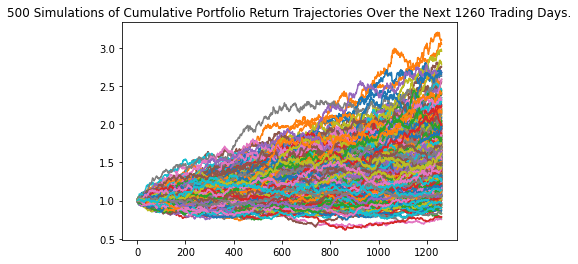

In [91]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot2 = MC_Stocks_5years.plot_simulation()

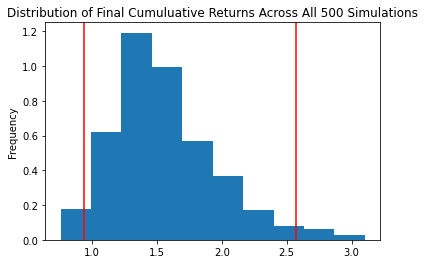

In [92]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot2 = MC_Stocks_5years.plot_distribution()

In [93]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
retirement_summary_5years = MC_Stocks_5years.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(retirement_summary_5years)

count           500.000000
mean              1.548186
std               0.392272
min               0.754951
25%               1.287296
50%               1.482080
75%               1.747881
max               3.102913
95% CI Lower      0.938410
95% CI Upper      2.570998
Name: 1260, dtype: float64


In [94]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(retirement_summary_5years[8]*initial_investment,2)
ci_upper_five = round(retirement_summary_5years[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56304.57 and $154259.89


### Ten Years Retirement Option

In [95]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_Stocks_10years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [96]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_Stocks_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994538,0.993621,0.998136,1.001476,1.003725,1.000103,0.999738,1.002794,1.006158,1.008854,...,1.004802,1.003294,0.991837,0.998270,1.003339,0.995565,1.001725,1.006272,1.008955,0.985867
2,1.001011,0.990285,0.996139,1.002984,0.999670,0.993785,1.005086,0.990288,0.999926,1.006805,...,1.014063,1.007894,0.988389,1.008031,0.992280,0.992922,1.002690,0.999686,1.013309,0.988573
3,1.003426,0.983991,1.004276,1.014507,0.999131,0.994412,1.010599,0.998817,0.997498,1.013158,...,1.004540,1.005293,0.992383,1.010834,0.997282,0.992299,1.008112,1.015184,1.014519,0.998578
4,1.005665,0.984884,1.000125,1.014338,1.001935,1.001277,1.011764,1.010417,1.004169,1.019680,...,1.011112,1.003406,1.000336,1.019104,0.998979,0.992579,1.000224,1.013088,1.012133,1.001827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.930439,3.048086,2.563680,2.138547,2.346743,2.629471,4.659070,1.313663,2.437870,2.660449,...,2.413972,1.051852,3.515932,2.189910,2.168804,1.345778,1.199268,2.020789,2.879117,1.113273
2517,2.924256,3.035847,2.575426,2.142242,2.334018,2.627986,4.629671,1.320745,2.390367,2.661037,...,2.392868,1.056992,3.495088,2.178533,2.168845,1.339145,1.194833,2.024662,2.931152,1.117951
2518,2.903227,3.054266,2.532730,2.138080,2.328669,2.616158,4.647912,1.316985,2.401875,2.652357,...,2.382339,1.061301,3.496310,2.171502,2.177647,1.322671,1.203094,2.046793,2.924235,1.119651
2519,2.932291,3.035670,2.559837,2.129391,2.329706,2.596916,4.661730,1.318729,2.399885,2.651981,...,2.388446,1.067848,3.479501,2.158977,2.144216,1.314992,1.202993,2.058287,2.942778,1.122528


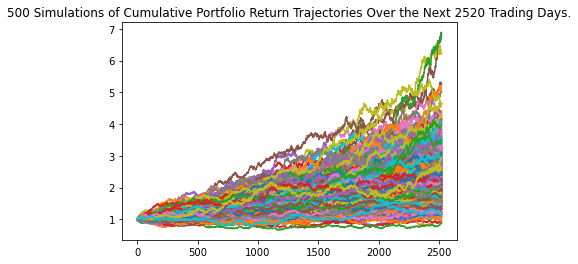

In [97]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot3 = MC_Stocks_10years.plot_simulation()

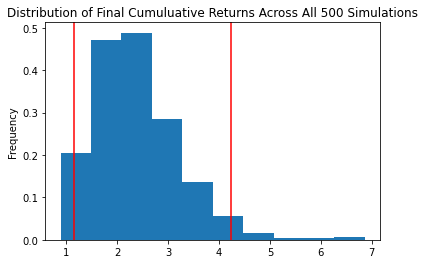

In [98]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot3 = MC_Stocks_10years.plot_distribution()

In [99]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
retirement_summary_10years = MC_Stocks_10years.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(retirement_summary_10years)

count           500.000000
mean              2.373366
std               0.853363
min               0.886509
25%               1.767073
50%               2.224362
75%               2.832394
max               6.864651
95% CI Lower      1.148870
95% CI Upper      4.229345
Name: 2520, dtype: float64


In [100]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(retirement_summary_10years[8]*initial_investment,2)
ci_upper_ten = round(retirement_summary_10years[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $68932.18 and $253760.68
